## Getting Started with Robosuite

This tutorial walks through installing robosuite, spinning up a simulation, rolling out a simple policy, and exploring custom robotics manipulation tasks.

### Background
Robosuite is an open-source simulation framework developed by the Stanford Vision and Learning Lab in 2017 for research in robot learning and manipulation. It is actively maintained by the NVidia GEAR Lab, SVL, and UT Austin Robot Perception Laboratory (RPL). 

**What it offers**
* *Standardized Tasks*: set of standardized manipulation tasks used for benchmarking
* *Modularized Generation*: modular APIs to custom create new environments, tasks, objects, robot models, arenas
* *Robot Controllers*: joint-space velocity, inverse kinematic control, operational space control, whole body control
* *Teleoperation Devices*: keyboard, spacemouse, dualsenese, MuJoCo viewer drag-drop
* *Multi-modal Sensors*: low-level physical states, RGB cameras, depth maps, and proprioception
* *Human Demonstrations*: tools to collect expert demonstrations and replaying demonstration datasets
* *Photorealistic Rendering*: integration with NVIDIA Isaac Sim rendering.

### Installation
**Prerequisites**
* Python 3.8+ with pip
* MuJoCo physics engine `pip install mujoco`
* `imageio` for saving rollouts as GIF/MP4

Note: In general, it is preferred to run Robotics setups on Linux or a Linux VM. However, for the purposes of this tutorial I will only show demonstrations on how to use these APIs on MacOS. 

In [ ]:
%pip install --quiet --upgrade robosuite robosuite_models mujoco imageio numpy

Note: you may need to restart the kernel to use updated packages.


Verify the installation...

In [45]:
import robosuite 
import mujoco

print(f"robosuite version: {robosuite.__version__}")
print(f"mujoco version: {mujoco.__version__}")

robosuite version: 1.5.1
mujoco version: 3.3.7


### Custom Environment

We'll use the classic `Lift` task with a Panda arm using a simple random learning policy. 

[robosuite INFO] Loading controller configuration from: /Users/jwei302/Dev/robosuite/robosuite/controllers/config/robots/default_panda.json (composite_controller_factory.py:121)


Environment created successfully!
Action dimension: 7
Action spec (low, high): (array([-1., -1., -1., -1., -1., -1., -1.]), array([1., 1., 1., 1., 1., 1., 1.]))
Reset complete. Observation keys: ['robot0_joint_pos', 'robot0_joint_pos_cos', 'robot0_joint_pos_sin', 'robot0_joint_vel', 'robot0_joint_acc', 'robot0_eef_pos', 'robot0_eef_quat', 'robot0_eef_quat_site', 'robot0_gripper_qpos', 'robot0_gripper_qvel', 'cube_pos', 'cube_quat', 'gripper_to_cube_pos', 'robot0_proprio-state', 'object-state']
Episode finished at step 4999
Total reward after 5000 steps: 0.000
Rendered frame shape: (512, 512, 3)


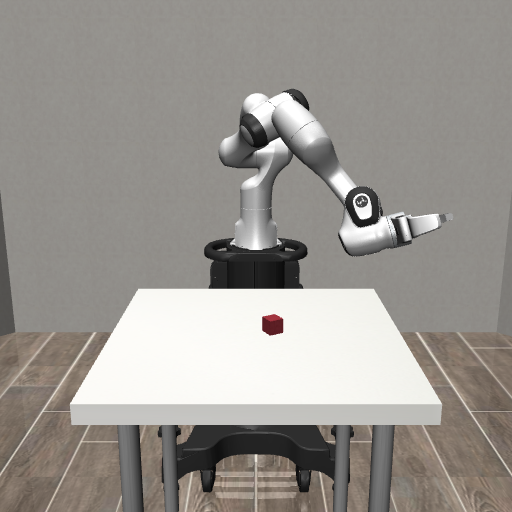

In [ ]:
import robosuite as suite
from robosuite.controllers import load_composite_controller_config 
import numpy as np
from PIL import Image

# Load controller configuration for Panda robot
controller_config = load_composite_controller_config(robot="Panda")

# Create the Lift environment with Panda arm
env = suite.make(
    env_name="Lift",
    robots="Panda",
    controller_configs=controller_config,
    has_renderer=False,  # Disabled for Mac compatibility
    has_offscreen_renderer=True,  # Enable for image capture
    use_camera_obs=False, 
    control_freq=20,
    horizon=5000,
    camera_names="frontview"  # Specify camera for rendering
)

print("Environment created successfully!")
print(f"Action dimension: {env.action_dim}")
print(f"Action spec (low, high): {env.action_spec}")

# Reset environment
obs = env.reset()
print(f"Reset complete. Observation keys: {list(obs.keys())}")

# Run a simple random policy for a few steps
total_reward = 0.0
for step in range(5000):
    # Sample random action
    low, high = env.action_spec
    action = np.random.uniform(low, high)
    
    # Take step
    obs, reward, done, info = env.step(action)
    total_reward += reward
    
    if done:
        print(f"Episode finished at step {step}")
        break

print(f"Total reward after {step+1} steps: {total_reward:.3f}")

# Render using sim renderer directly
env.sim.render(camera_name="frontview", height=512, width=512)
frame = env.sim.render(camera_name="frontview", height=512, width=512)
print(f"Rendered frame shape: {frame.shape}")

# Display the frame
display(Image.fromarray(frame).rotate(180))

We can have different visualizations angles...

Available cameras: ('frontview', 'birdview', 'agentview', 'sideview', 'robot0_robotview', 'robot0_eye_in_hand')
Frontview:


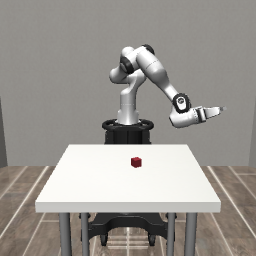

Birdview:


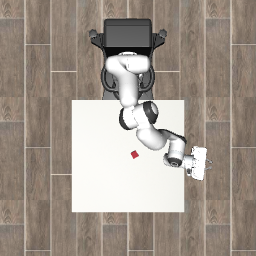

Agentview:


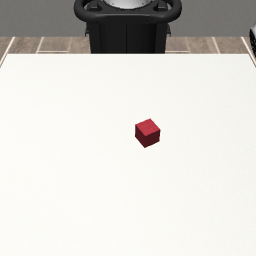

Sideview:


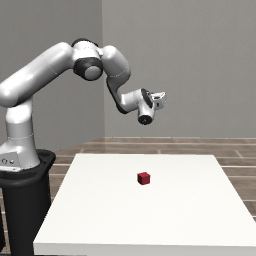

In [55]:
import numpy as np

# List available cameras
print("Available cameras:", env.sim.model.camera_names)

# Try different camera views
camera_views = ["frontview", "birdview", "agentview", "sideview"]

for cam_name in camera_views:
    if cam_name in env.sim.model.camera_names:
        frame = env.sim.render(camera_name=cam_name, height=256, width=256)
        print(f"{cam_name.capitalize()}:")
        display(Image.fromarray(frame).rotate(180))